# **Red hat project**

# Part III. Modelling

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import cross_validate, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, validation_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.inspection import plot_partial_dependence
import xgboost as xgb
from catboost import CatBoostClassifier

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
sns.set(rc={'figure.figsize':(15,10)})

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 17

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)  
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)

In [4]:
plots_path = './plots'

## 1. Importing data

In [5]:
def import_clean_dataset(filename, path = './csv_files', X=True):
#the aim of this function is to import csv files as dataframes (if X == True) or as numpy array
    if X:
        return pd.read_csv(os.path.join(path, filename), index_col = 'activity_index')
    return np.ravel(pd.read_csv(os.path.join(path, filename), index_col = 'activity_index'))

In [6]:
X_train = import_clean_dataset(filename = 'red_hat_train.csv')
X_test = import_clean_dataset(filename = 'red_hat_test.csv')
y_train = import_clean_dataset(filename = 'outcome_train.csv', X = False)
y_test = import_clean_dataset(filename ='outcome_test.csv', X = False)

In [7]:
X_train.head()

,char_4_pep,char_5_pep,char_7_pep,char_9_pep,char_10_pep,char_11,char_12,char_14,char_17,char_20,char_25,char_27,char_30,char_31,char_32,char_33,char_34,char_35,char_37,month_pep,year_pep,weekend_flg_pep,year_act,weekend_flg_act
activity_index,,,,,,,,,,,,,,,,,,,,,,,,
"(2, 3769922)",0.360,0.025,0.467,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.576,0.091,0,0,0
"(2, 2255070)",0.469,0.162,0.519,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.477,0.091,0,0,1
"(2, 1102570)",0.535,0.064,0.390,0.249,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,0.450,0.091,0,0,0
"(2, 4143394)",0.360,0.025,0.467,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.500,0.189,1,1,1
"(2, 3554173)",0.360,0.025,0.390,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.450,0.091,0,0,0


In [8]:
X_test.head()

,char_4_pep,char_5_pep,char_7_pep,char_9_pep,char_10_pep,char_11,char_12,char_14,char_17,char_20,char_25,char_27,char_30,char_31,char_32,char_33,char_34,char_35,char_37,month_pep,year_pep,weekend_flg_pep,year_act,weekend_flg_act
activity_index,,,,,,,,,,,,,,,,,,,,,,,,
"(2, 2791174)",0.386,0.069,0.898,0.249,0,1,0,0,1,1,1,0,0,0,1,0,1,0,1,0.346,0.091,1,0,0
"(2, 4219859)",0.360,0.025,0.519,0.249,1,1,0,0,1,1,1,0,0,0,1,0,1,0,1,0.500,0.166,1,1,0
"(2, 2522827)",0.386,0.115,0.467,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.576,0.189,0,1,0
"(2, 908393)",0.360,0.025,0.104,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.500,0.554,0,1,0
"(2, 4370791)",0.557,0.055,0.059,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.346,0.091,0,0,0


In [9]:
X_train.shape

(1713886, 24)

In [10]:
y_train.shape

(1713886,)

In [11]:
X_test.shape

(483405, 24)

In [12]:
y_test.shape

(483405,)

## 2. Testing default models

**Three models with default parameters** will be trained in order to pick one model with the best results and perform parameter tuning.
- Random Forest
- XGBoost
- CatBoost

### 2.1. Prediction & model evaluation functions

In [13]:
#specifying the random seed to enable reproducibility of the predictions
random_seed = 42

In [14]:
def make_predictions(classifier, X, y):
    """
    The function takes in a fitted model, dataframe with features and a numpy array with the outcomes.
    
    It returns a numpy array with lists containing predicted probabilites of the target = 0 and target = 1.
    """
    pred = cross_val_predict(classifier, X, y, cv =5, method = 'predict_proba', verbose = False)
    return pred

In [15]:
def evaluate_scores(y, y_pred, thresh=0.5):
    """
    The function takes in:
    - a numpy array with the true target values, 
    - a numpy array with predicted probabilities of the target 
    - a probability threshold for classification.
    
    It returns a dataframe with two columns: names of metrics (accuracy, precision, recall, f1, roc auc score) and scores.
    """
    #creating a numpy array with predicted values of the target (0 or 1) based on the probability threshold
    y_pred_vals = (y_pred[:,1] >= thresh).astype('int')
    
    # metrics
    acc = accuracy_score(y, y_pred_vals)
    prec = precision_score(y, y_pred_vals)
    rec = recall_score(y, y_pred_vals)
    f1 = f1_score(y, y_pred_vals)
    roc = roc_auc_score(y, y_pred_vals)
    
    metrics = pd.DataFrame({'metrics': ['accuracy', 'precision','recall','f1','roc_auc'],
                            'scores': [acc, prec, rec, f1, roc]})
    
    return metrics

In [16]:
def evaluate_cmatrix(y, y_pred, thresh = 0.5):
    """
    The function takes in:
    - a numpy array with the true target values, 
    - a numpy array with predicted probabilities of the target 
    - a probability threshold for classification.
    
    It returns a dataframe with the confusion matrix, where rows represten the actual class and columns - predicted class.
    """
    #creating a numpy array with predicted values of the target (0 or 1) based on the probability threshold    
    y_pred_vals = (y_pred[:,1] >= thresh).astype('int')
    
    tn, fp, fn, tp = confusion_matrix(y, y_pred_vals).ravel()
    
    # PN - predicted negative, PP - predicted positive, TN - true negative, TP - true positive
    cmatrix = pd.DataFrame({'PN': [tn, fn],
                            'PP':[fp, tp]},
                            index = ['TN','TP'])
    
    return cmatrix

In [17]:
def plot_feature_importance(classifier, classifier_name, X, random_seed, what_params = 'default'):
    """
    The function takes in:
    - a fitted classifier
    - a string with the name of the classifier (e.g. "Random Forest")
    - a dataframe with the features
    - random seed
    - a string with the kind of parameters used to fit the model (e.g. "default", "specified")
    
    It returns a png object with the visual representation (horizontal bar plot) of the feature importance of variables used to train the classifier.
    """
    # dataframe with names of variables and their importances
    feature_importance = pd.DataFrame({'features' : X.columns,
                                        'importance': classifier.feature_importances_,
                                       }).sort_values('importance', ascending= False).reset_index(drop=True)
    
    features = feature_importance['features']
    importances = feature_importance['importance']
    indices = np.argsort(importances)
    
    plt.barh(range(len(indices)), importances[indices], color = '#93A8AC', align = 'center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.title(f'Feature importance - {classifier_name} with {what_params} hyperparameters')
    plt.savefig(os.path.join(plots_path, f'feature_importance_{what_params}_{classifier_name}.png'))

### 2.2. Random Forest

In [20]:
rf = RandomForestClassifier(random_state=random_seed)

In [21]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
y_train_pred  = make_predictions(rf, X_train, y_train)
y_test_pred  = make_predictions(rf, X_test, y_test)

In [23]:
metrics_train = evaluate_scores(y_train, y_train_pred)
metrics_test = evaluate_scores(y_test, y_test_pred)

In [24]:
cm_train = evaluate_cmatrix(y_train, y_train_pred)
cm_test= evaluate_cmatrix(y_test, y_test_pred)

In [25]:
metrics_train

,metrics,scores
0,accuracy,0.944
1,precision,0.942
2,recall,0.931
3,f1,0.937
4,roc_auc,0.943


In [26]:
metrics_test

,metrics,scores
0,accuracy,0.925
1,precision,0.918
2,recall,0.913
3,f1,0.915
4,roc_auc,0.924


In [27]:
cm_train

,PN,PP
TN,909145,43854
TP,52236,708651


In [28]:
cm_test

,PN,PP
TN,251237,17558
TP,18651,195959


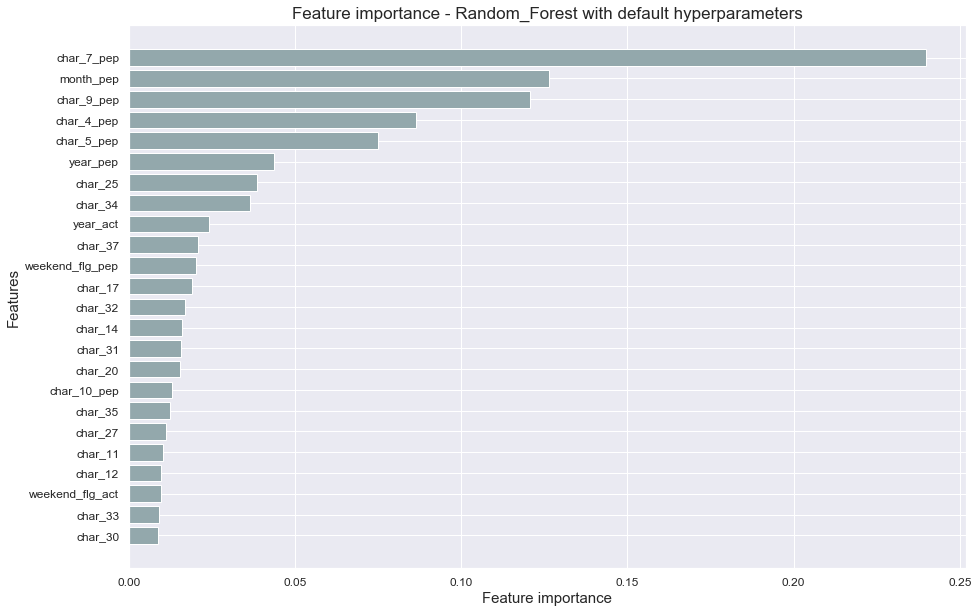

In [29]:
plot_feature_importance(rf, "Random_Forest", X_train, random_seed)

### 2.3. XGBoost

In [30]:
xg = xgb.XGBClassifier(random_state=random_seed)

In [31]:
xg.fit(X_train, y_train)

XGBClassifier(random_state=42)

In [32]:
y_train_pred  = make_predictions(xg, X_train, y_train)
y_test_pred  = make_predictions(xg, X_test, y_test)

In [33]:
metrics_train = evaluate_scores(y_train, y_train_pred)
metrics_test = evaluate_scores(y_test, y_test_pred)

In [34]:
cm_train = evaluate_cmatrix(y_train, y_train_pred)
cm_test= evaluate_cmatrix(y_test, y_test_pred)

In [35]:
metrics_train

,metrics,scores
0,accuracy,0.761
1,precision,0.727
2,recall,0.740
3,f1,0.734
4,roc_auc,0.759


In [36]:
metrics_test

,metrics,scores
0,accuracy,0.762
1,precision,0.728
2,recall,0.740
3,f1,0.734
4,roc_auc,0.760


In [37]:
cm_train

,PN,PP
TN,741837,211162
TP,197664,563223


In [38]:
cm_test

,PN,PP
TN,209532,59263
TP,55794,158816


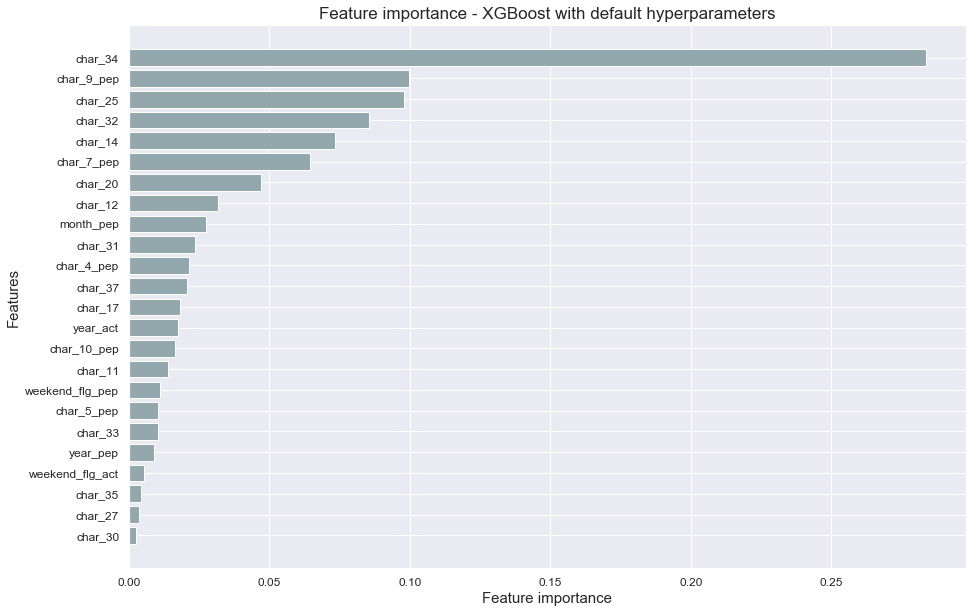

In [39]:
plot_feature_importance(xg, "XGBoost", X_train, random_seed)

### 2.4. CatBoost

In [40]:
cb = CatBoostClassifier(random_seed=random_seed)

In [41]:
cb.fit(X_train, y_train, silent = True)

In [55]:
y_train_pred  = make_predictions(cb, X_train, y_train)
y_test_pred  = make_predictions(cb, X_test, y_test)

In [56]:
metrics_train = evaluate_scores(y_train, y_train_pred)
metrics_test = evaluate_scores(y_test, y_test_pred)

In [57]:
cm_train = evaluate_cmatrix(y_train, y_train_pred)
cm_test= evaluate_cmatrix(y_test, y_test_pred)

In [58]:
metrics_train

,metrics,scores
0,accuracy,0.831
1,precision,0.806
2,recall,0.816
3,f1,0.811
4,roc_auc,0.829


In [59]:
metrics_test

,metrics,scores
0,accuracy,0.819
1,precision,0.790
2,recall,0.806
3,f1,0.798
4,roc_auc,0.817


In [60]:
cm_train

,PN,PP
TN,803428,149571
TP,140330,620557


In [61]:
cm_test

,PN,PP
TN,222766,46029
TP,41618,172992


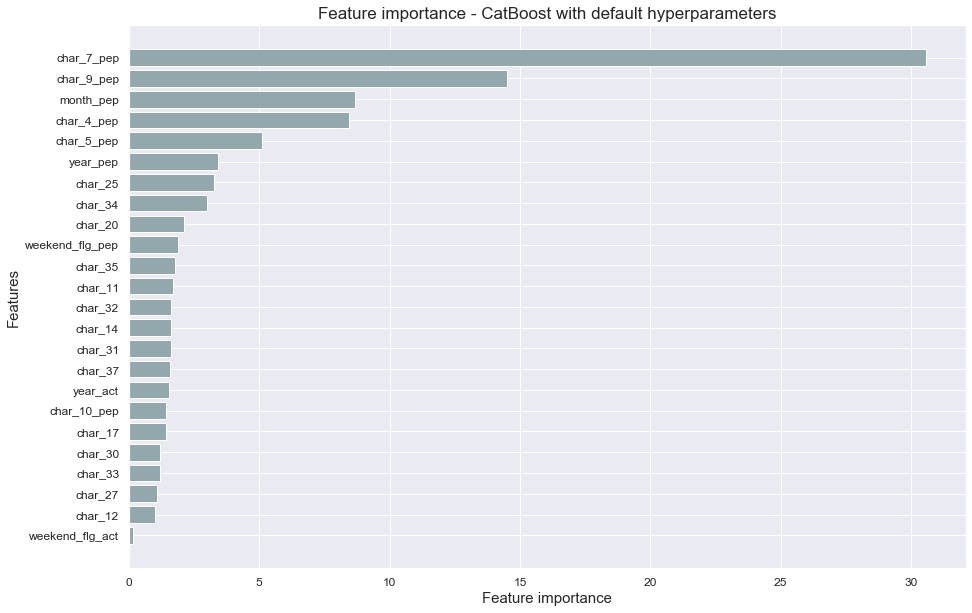

In [62]:
plot_feature_importance(cb, "CatBoost", X_train, random_seed)

## 3. Hyperparameter tuning

Amongst the three tested models **Random Forest** shows the best results with default parameters. For this specific model hyperparameter tuning will be performed.

### 3.1. Visualisation of the parameters

Visualisation of hyperparameters is important in the light of choosing the right hyperparameters to tune.

Performance of the model will be evaluated based on **f1 score** because it combines the precision and recall scores.

In [63]:
scoring = 'f1'

In [64]:
def plot_validation_curve(X, y, param_name, range_param, scoring, random_seed, n_estimators=10):
    """
    The function takes in:
    - a dataframe with features (X)
    - a numpy array with the target variable (y)
    - the name of the parameter to visualise
    - the range of values of a given parameter (a range or a list of values)
    - the scoring function (e.g. roc_auc, f1, accuracy, etc.)
    - random seed
    - number of trees (due to RAM issues the default for me is 10)
    
    The result of this function is a png file with the visualisation of the scoring function values depending on the paramater's values.
    """
    #
    train_scores_arr, test_scores_arr = validation_curve(RandomForestClassifier(random_state = random_seed, n_estimators = n_estimators),
                                                        X = X, 
                                                        y = y, 
                                                        param_name = param_name, 
                                                        param_range = range_param,
                                                        cv = 3,
                                                        n_jobs = -1,
                                                        scoring = scoring)
    
    train_scores = np.mean(train_scores_arr, axis=1)
    test_scores = np.mean(test_scores_arr, axis=1)
    
    
    
    train_plot, = plt.plot(range_param, train_scores, color = '#A18276')
    test_plot, = plt.plot(range_param, test_scores, color = '#086788')
    plt.legend([train_plot, test_plot], ["train set", "test set"])
    plt.title(f"{scoring} values depending on {param_name}")
    plt.xlabel(f"{param_name} values")
    plt.ylabel(f"{scoring} scores")
    plt.savefig(f"./plots/{param_name}_{scoring}_validation.png")

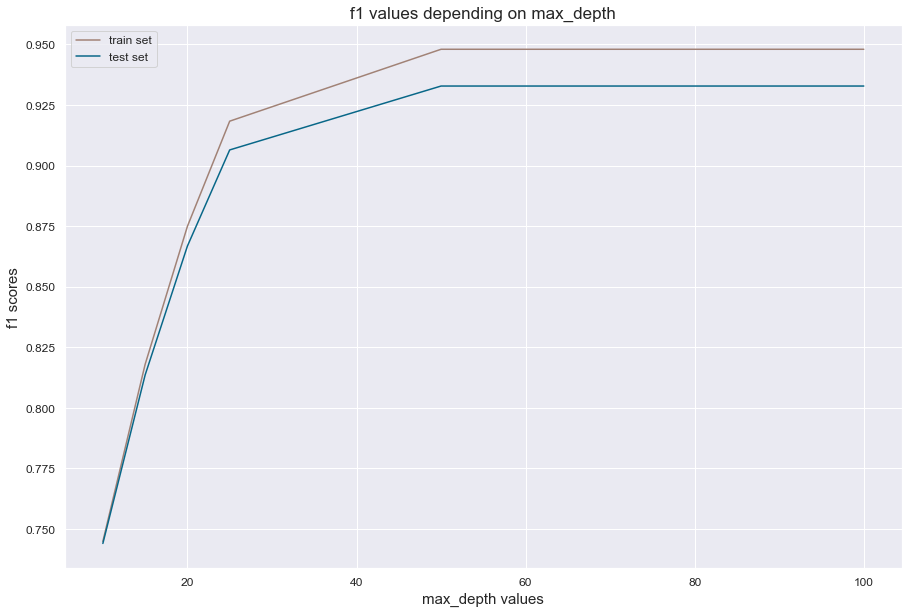

In [17]:
plot_validation_curve(X_train, y_train, 'max_depth', [10, 15, 20, 25, 50, 100], scoring, random_seed)

For max_depth <= 20 the model seems to perform almost the same on the train and test sets. However, the f1 score increases significantly till max_depth reaches 25. After that the increase is rather steady, but the difference in performance on the train and test set increases as well. In the next steps **max_depth values from 20 to 25** will be evaluated.

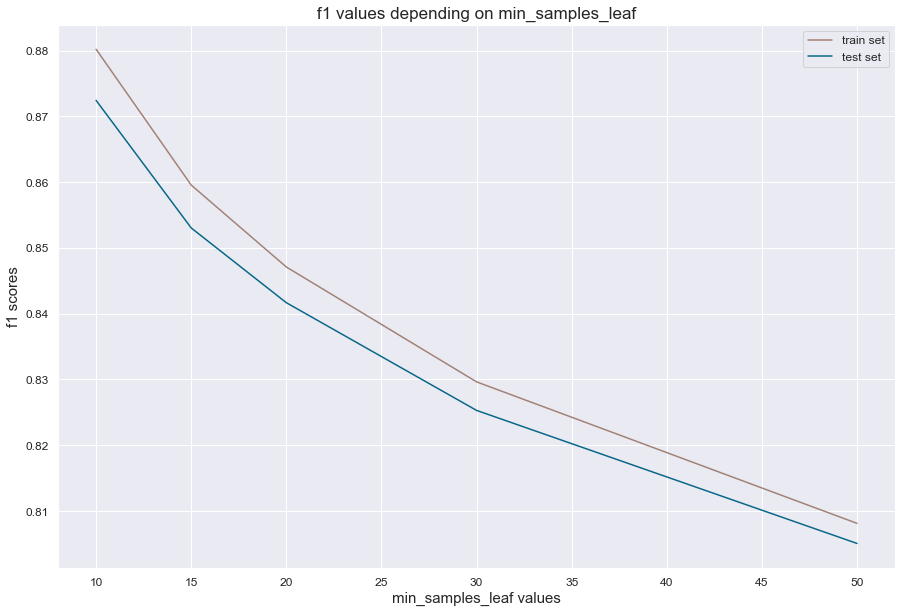

In [18]:
plot_validation_curve(X_train, y_train, 'min_samples_leaf', [10, 15, 20, 30, 50], scoring, random_seed)

The performance of the model decreases as the min_samples_leaf values increase, with the sharpert decrease between 10 and 20. Around min_samples_leaf = 20 the difference in performance on train and test set is the biggest. **Values from 10 to 18** will be tested in the Randomized Search.

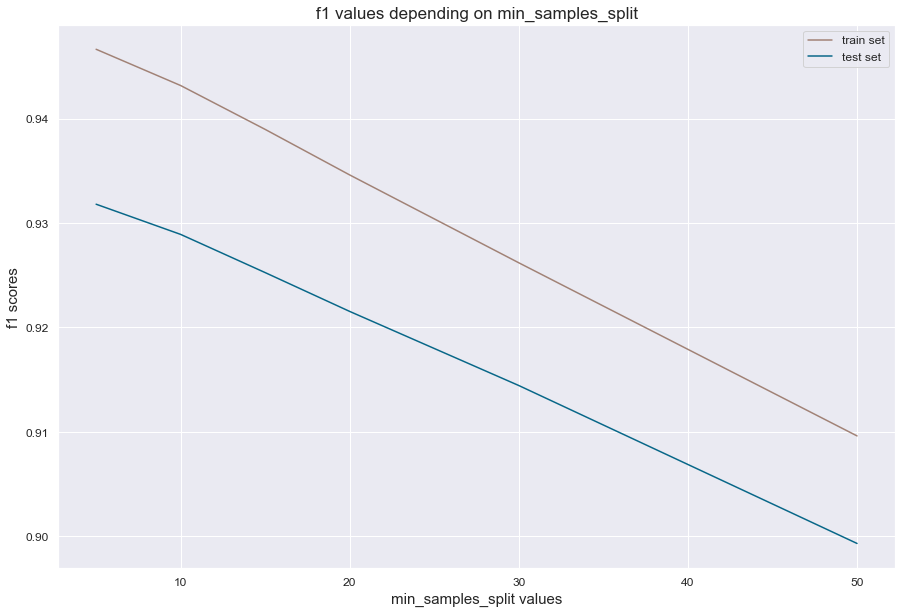

In [17]:
plot_validation_curve(X_train, y_train, 'min_samples_split', [5, 10, 15, 20, 30, 50], scoring, random_seed)

As the min_samples_split values increase, the performance of the model and the difference between performance on the train and test set decrease. **Values around 10** will be evaluated in the next step.

### 3.2. Randomized Search

In [18]:
def rf_best_params(X, y, random_seed, scoring,
                         max_features, max_depth, min_samples_split, 
                         min_samples_leaf, n_estimators):
    
    rf_def = RandomForestClassifier(random_state = random_seed)
    
    grid = {'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'n_estimators': n_estimators}
    
    rf_rsearch = RandomizedSearchCV(rf_def, param_distributions=grid, n_iter= 3, n_jobs=-1, cv = 3)
    
    rf_rsearch.fit(X, y)
    
    return rf_rsearch.best_params_, rf_rsearch.best_score_

In [19]:
#base params
max_features = ['auto','log2']
max_depth = range(20, 26, 2)
min_samples_split = range(10,16,2)
min_samples_leaf = range(10, 18, 3)
n_estimators = [100]

In [20]:
best_params, best_score = rf_best_params(X_train, y_train, random_seed, scoring, max_features, max_depth, min_samples_split, min_samples_leaf, n_estimators)

In [21]:
best_params

{'n_estimators': 100,
 'min_samples_split': 14,
 'min_samples_leaf': 13,
 'max_features': 'log2',
 'max_depth': 24}

In [22]:
best_score

0.872905198893986

In [23]:
max_features = ['auto']
max_depth = range(21,24)
min_samples_split = range(10,12)
min_samples_leaf = range(11,14)
n_estimators = [100]

In [24]:
best_params1, best_score1 = rf_best_params(X_train, y_train, random_seed, scoring, max_features, max_depth, min_samples_split, min_samples_leaf,n_estimators)

In [25]:
best_params1

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 11,
 'max_features': 'auto',
 'max_depth': 23}

In [26]:
best_score1

0.8743708740967905

In [27]:
if best_score1 > best_score:
    best_score = best_score1
    best_params = best_params1

In [28]:
del best_score1
del best_params1

Although the results after hyperparameter tuning turned out to be worse than default scores, there are still good and they will be used to find out the new scores on the test set.

## 4. Training the final model

In [30]:
rf_final = RandomForestClassifier(**best_params, random_state = random_seed)

In [31]:
rf_final

RandomForestClassifier(max_depth=23, min_samples_leaf=11, min_samples_split=10,
                       random_state=42)

In [32]:
rf_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=23, min_samples_leaf=11, min_samples_split=10,
                       random_state=42)

In [33]:
y_train_pred  = make_predictions(rf_final, X_train, y_train)
y_test_pred  = make_predictions(rf_final, X_test, y_test)

In [34]:
metrics_train = evaluate_scores(y_train, y_train_pred)
metrics_test = evaluate_scores(y_test, y_test_pred)

In [35]:
cm_train = evaluate_cmatrix(y_train, y_train_pred)
cm_test= evaluate_cmatrix(y_test, y_test_pred)

In [36]:
metrics_train

,metrics,scores
0,accuracy,0.879
1,precision,0.884
2,recall,0.838
3,f1,0.860
4,roc_auc,0.875


In [37]:
metrics_test

,metrics,scores
0,accuracy,0.844
1,precision,0.830
2,recall,0.816
3,f1,0.823
4,roc_auc,0.841


In [38]:
cm_train

,PN,PP
TN,868949,84050
TP,123336,637551


In [39]:
cm_test

,PN,PP
TN,232791,36004
TP,39426,175184


The scores are dissapointing as they are significantly worse than those of the default Random Forest parameters and they also tend to overfit more.

A different approach must be then taken into consideration.

## 5. Evaluating the model

### 5.1. Random Forest with default params + more trees

A small number of trees can lead to overfitting. When we add additional trees to the Random Forest then the tendency to overfitting should decrease.

In [40]:
rf_trees = RandomForestClassifier(n_estimators=200, random_state=random_seed)

In [41]:
rf_trees.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [42]:
y_train_pred  = make_predictions(rf_trees, X_train, y_train)
y_test_pred  = make_predictions(rf_trees, X_test, y_test)

In [43]:
metrics_train = evaluate_scores(y_train, y_train_pred)
metrics_test = evaluate_scores(y_test, y_test_pred)

In [44]:
cm_train = evaluate_cmatrix(y_train, y_train_pred)
cm_test = evaluate_cmatrix(y_test, y_test_pred)

In [45]:
metrics_train

,metrics,scores
0,accuracy,0.944
1,precision,0.942
2,recall,0.931
3,f1,0.937
4,roc_auc,0.943


In [46]:
metrics_test

,metrics,scores
0,accuracy,0.925
1,precision,0.918
2,recall,0.913
3,f1,0.916
4,roc_auc,0.924


In [47]:
cm_train

,PN,PP
TN,909205,43794
TP,52183,708704


In [48]:
cm_test

,PN,PP
TN,251300,17495
TP,18664,195946


In [49]:
sklearn.__version__

'0.23.2'

The results are slightly less overfitted than in the case of Random Forest with default paramaters (default n_estimators=100 in sklearn 0.23.2).

### 5.2. CatBoost with different params

CatBoost with default parameters had pretty good results, so one of the option tested will be to train CatBoost with specified parameters.

#### 5.2.1. Specifying categorical columns

In [50]:
cb_new = CatBoostClassifier(random_seed = random_seed)

In [51]:
#categorical (binary) columns
cols_cat = X_train.select_dtypes(include=['int']).columns

In [52]:
cat_idx = [X_train.columns.get_loc(c) for c in cols_cat]

In [74]:
cb_new.fit(X_train, y_train, cat_idx)

In [75]:
y_train_pred  = make_predictions(cb_new, X_train, y_train)
y_test_pred  = make_predictions(cb_new, X_test, y_test)

In [55]:
metrics_train = evaluate_scores(y_train, y_train_pred)
metrics_test = evaluate_scores(y_test, y_test_pred)

In [56]:
cm_train = evaluate_cmatrix(y_train, y_train_pred)
cm_test= evaluate_cmatrix(y_test, y_test_pred)

In [57]:
metrics_train

,metrics,scores
0,accuracy,0.831
1,precision,0.806
2,recall,0.816
3,f1,0.811
4,roc_auc,0.829


In [58]:
metrics_test

,metrics,scores
0,accuracy,0.819
1,precision,0.790
2,recall,0.806
3,f1,0.798
4,roc_auc,0.817


In [59]:
cm_train

,PN,PP
TN,803428,149571
TP,140330,620557


In [60]:
cm_test

,PN,PP
TN,222766,46029
TP,41618,172992


Specifying categorical columns did not improve the results of CatBoost. It might have been useful if the categorical variables in the dataset hadn't been encoded.

#### 5.2.2. Randomized Search

In [61]:
cb_model = CatBoostClassifier(random_seed = random_seed)

In [62]:
params = {'learning_rate': [0.03, 0.1],
          'depth': [4, 6, 10],
          'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [63]:
rsearch_results = cb_model.randomized_search(params,
                                              X_train,
                                              y_train,
                                              cv=3,
                                              n_iter=5,
                                              partition_random_seed=0,
                                              calc_cv_statistics=True, 
                                              search_by_train_test_split=True,
                                              refit=True, 
                                              shuffle=True, 
                                              stratified=None, 
                                              train_size=0.8, 
                                              verbose=True)

0:	loss: 0.4347438	best: 0.4347438 (0)	total: 2m 5s	remaining: 8m 22s
1:	loss: 0.3880169	best: 0.3880169 (1)	total: 4m 12s	remaining: 6m 19s
2:	loss: 0.4348285	best: 0.3880169 (1)	total: 6m 18s	remaining: 4m 12s
3:	loss: 0.3879648	best: 0.3879648 (3)	total: 8m 25s	remaining: 2m 6s
4:	loss: 0.2474205	best: 0.2474205 (4)	total: 11m 39s	remaining: 0us
Estimating final quality...


In [64]:
rsearch_results['params']

{'depth': 10, 'l2_leaf_reg': 3, 'learning_rate': 0.1}

In [65]:
cb_new_params = CatBoostClassifier(**rsearch_results['params'], random_seed = random_seed)

In [76]:
cb_new_params.fit(X_train, y_train)

In [77]:
y_train_pred  = make_predictions(cb_new_params, X_train, y_train)
y_test_pred  = make_predictions(cb_new_params, X_test, y_test)

In [68]:
metrics_train = evaluate_scores(y_train, y_train_pred)
metrics_test = evaluate_scores(y_test, y_test_pred)

In [69]:
cm_train = evaluate_cmatrix(y_train, y_train_pred)
cm_test= evaluate_cmatrix(y_test, y_test_pred)

In [70]:
metrics_train

,metrics,scores
0,accuracy,0.903
1,precision,0.900
2,recall,0.879
3,f1,0.889
4,roc_auc,0.901


In [71]:
metrics_test

,metrics,scores
0,accuracy,0.896
1,precision,0.890
2,recall,0.873
3,f1,0.881
4,roc_auc,0.893


In [72]:
cm_train

,PN,PP
TN,878506,74493
TP,91773,669114


In [73]:
cm_test

,PN,PP
TN,245739,23056
TP,27320,187290


The results have improved due to the hyperparamter tuning. 

But still Random Forest Classifier with default parameters and a larger number of trees performs better and it will be chosen for this task.

## 6. Adjusting the probability threshold

By default the probability threshold is set to 0.5. But it may not be the optimal threshold for this task.

In [78]:
y_train_pred  = make_predictions(rf_trees, X_train, y_train)
y_test_pred  = make_predictions(rf_trees, X_test, y_test)

In [79]:
metrics_train = evaluate_scores(y_train, y_train_pred)
metrics_test = evaluate_scores(y_test, y_test_pred)

In [80]:
cm_train = evaluate_cmatrix(y_train, y_train_pred)
cm_test= evaluate_cmatrix(y_test, y_test_pred)

In [81]:
metrics_train

,metrics,scores
0,accuracy,0.944
1,precision,0.942
2,recall,0.931
3,f1,0.937
4,roc_auc,0.943


In [82]:
metrics_test

,metrics,scores
0,accuracy,0.925
1,precision,0.918
2,recall,0.913
3,f1,0.916
4,roc_auc,0.924


In [83]:
cm_train

,PN,PP
TN,909205,43794
TP,52183,708704


In [84]:
cm_test

,PN,PP
TN,251300,17495
TP,18664,195946


In [85]:
def plot_precision_recall_curve(y, y_pred):
    """
    The function takes in a numpy array with the target variable and a numpy array with the probabilities of the target=1.
    
    The function returns a png file with the plot of precision and recall depending on the probability threshold.
    """
    
    
    precisions, recalls, thresholds = precision_recall_curve(y, np.array(y_pred[:,1]))
    
    p1, = plt.plot(thresholds, precisions[:-1], color = '#A39BA8', linewidth = 3)
    p2, = plt.plot(thresholds, recalls[:-1], color = '#1C1C1C', linewidth = 3)
    plt.legend([p1, p2], ["precision", "recall"], loc = "lower left")
    plt.xlabel("Threshold")
    plt.ylabel("Precision/ recall values")
    plt.title("Precision vs recall depending on the threshold")
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.savefig(os.path.join(plots_path, 'precision_recall_threshold.png'))

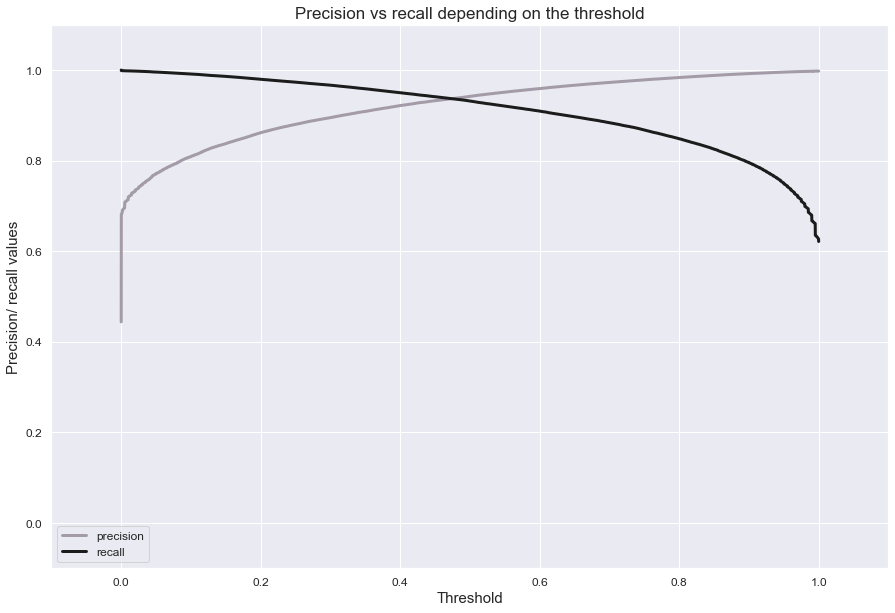

In [86]:
plot_precision_recall_curve(y_train, y_train_pred)

In [87]:
def optimal_thresh_roc_curve(y, y_pred):
    """
    The aim of the function is to find the best probability threshold based on the roc curve.
    
    The function takes in a numpy array with the target variable and a numpy array with the probabilities of the target=1.
    """
    fpr, tpr, thresholds = roc_curve(y, np.array(y_pred[:,1]))
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

In [88]:
thresh_roc = optimal_thresh_roc_curve(y_train, y_train_pred)

In [89]:
thresh_roc

0.45410875586252497

Both plots show that a threshold a bit below 0.5 (0.45) might be better in case of model performance.

In [90]:
metrics_train = evaluate_scores(y_train, y_train_pred, thresh_roc)
metrics_test = evaluate_scores(y_test, y_test_pred, thresh_roc)

In [91]:
cm_train = evaluate_cmatrix(y_train, y_train_pred, thresh_roc)
cm_test= evaluate_cmatrix(y_test, y_test_pred, thresh_roc)

In [92]:
metrics_train

,metrics,scores
0,accuracy,0.944
1,precision,0.933
2,recall,0.940
3,f1,0.937
4,roc_auc,0.943


In [93]:
metrics_test

,metrics,scores
0,accuracy,0.924
1,precision,0.906
2,recall,0.925
3,f1,0.915
4,roc_auc,0.924


In [94]:
cm_train

,PN,PP
TN,901533,51466
TP,45359,715528


In [95]:
cm_test

,PN,PP
TN,248118,20677
TP,16108,198502


Although the recall score on the test set is higher than in the case of threshold = 0.5 (0.925 vs. 0.913), the precision score has decreased (0.906 vs. 0.918). The accuracy and f1 scores also decreased by 0.001 and the roc auc score is the same.

Probability threshold = 0.5 seems to be a slightly better option as long as we consider f1 as the scoring function.

## 7. Exploring the influence of the features

### 7.1. Feature importance

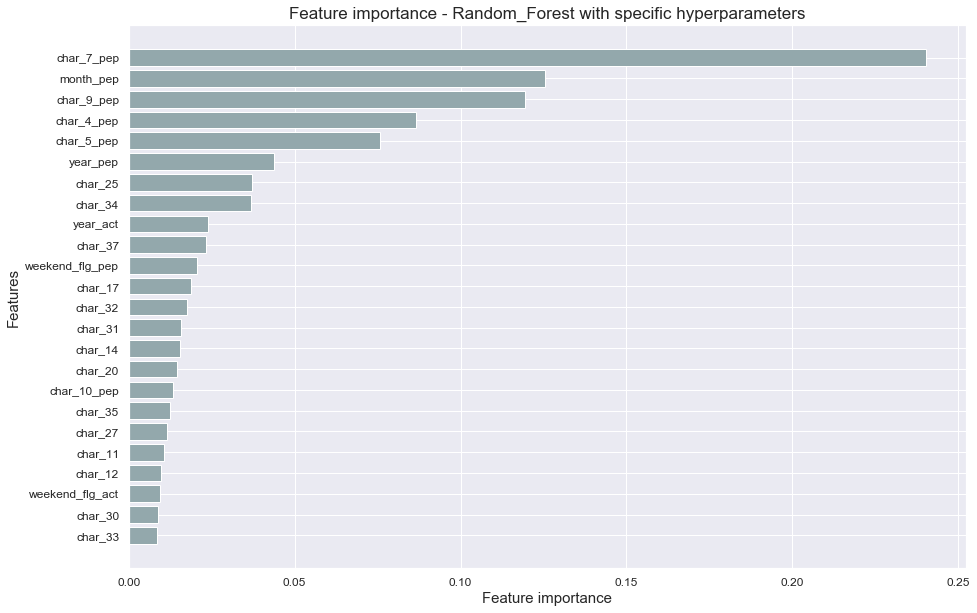

In [96]:
plot_feature_importance(rf_trees, "Random_Forest", X_train, random_seed, 'specific')

In [97]:
X_train.head()

,char_4_pep,char_5_pep,char_7_pep,char_9_pep,char_10_pep,char_11,char_12,char_14,char_17,char_20,char_25,char_27,char_30,char_31,char_32,char_33,char_34,char_35,char_37,month_pep,year_pep,weekend_flg_pep,year_act,weekend_flg_act
activity_index,,,,,,,,,,,,,,,,,,,,,,,,
"(2, 3769922)",0.360,0.025,0.467,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.576,0.091,0,0,0
"(2, 2255070)",0.469,0.162,0.519,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.477,0.091,0,0,1
"(2, 1102570)",0.535,0.064,0.390,0.249,1,0,1,1,1,0,1,1,1,1,1,1,1,1,0,0.450,0.091,0,0,0
"(2, 4143394)",0.360,0.025,0.467,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.500,0.189,1,1,1
"(2, 3554173)",0.360,0.025,0.390,0.051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.450,0.091,0,0,0


`char_7_pep` seems to have the biggest influence on the model's output. What's more, 6 of the features with the highest importance are those encoded using Mean Encoding and Frequency Encoding. They might be favoured because they seem to be continuous variables. 

The first, second and fourth variables (`char_7_pep`, `month_pep`, `char_4_pep`) were encoding using Mean Encoder and the third, fifth and sixth (`char_9_pep`, `char_5_pep`, `year_pep`) - using the Frequency Encoder.

However, the plot does not show the kind of influence variables have on the output. That will be explored using parial dependence plots.

### 7.2. Partial dependence plots

In [98]:
def partial_dependence_plots(model, X, y, max_features, hspace, size_x, size_y):
    feature_importance = pd.DataFrame(model.feature_importances_,
                                  index = X.columns,
                                  columns = ['importance']).sort_values('importance', ascending= False).reset_index()
    features = list(feature_importance.iloc[:max_features,0])
    
    rf_limit = RandomForestClassifier(n_estimators=200, random_state=random_seed)
    
    rf_limit.fit(X[features], y)
    
    plot_partial_dependence(rf_limit, X = X[features], features = features, feature_names = features, grid_resolution = 20)
    fig = plt.gcf()
    fig.suptitle(f"Partial dependence plots for {max_features} features with the highest importance")
    fig.subplots_adjust(hspace = hspace)
    fig.set_size_inches(size_x, size_y)
    plt.savefig(os.path.join(plots_path, 'partial_dependence_plots.png'))

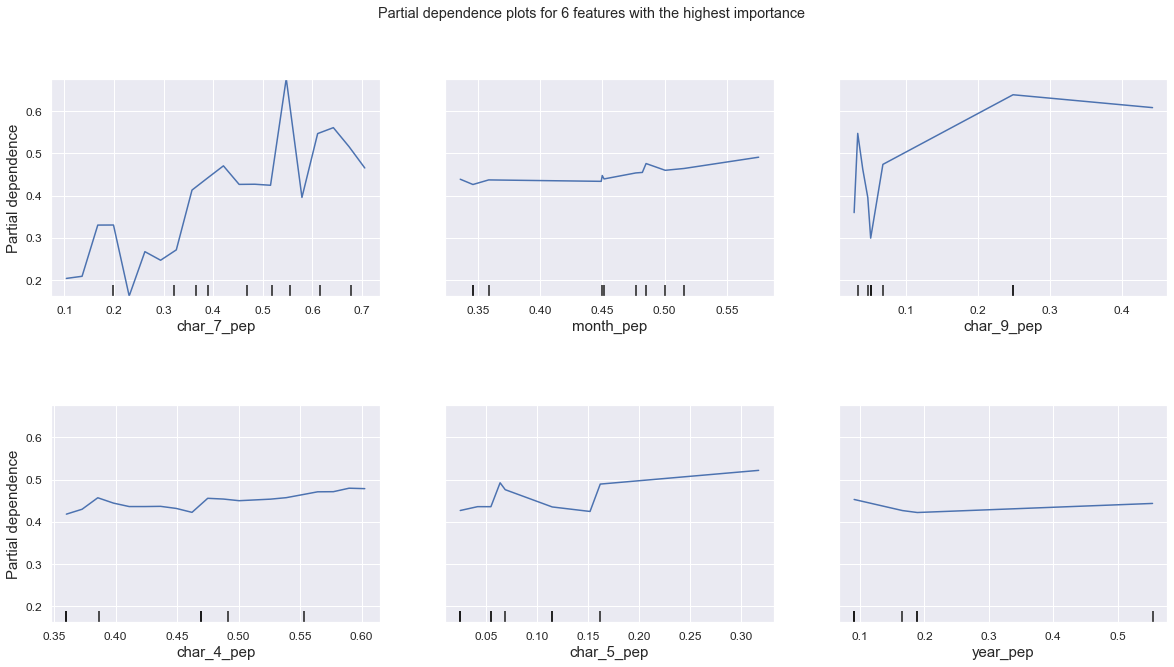

In [99]:
partial_dependence_plots(rf_trees, X_train, y_train, 6, 0.5, 20, 10)

The plots show the probability of the positive outcome depending on the value of a given variable. The direction of the influence strongly depends on the feature. 

For `char_7_pep` the relationship between the probability of a positive outcome and feature values is the most irregular. For `year_pep` the relationship is the most regular, with the probability of the positive outcome decreasing till year_pep = 0.2 and slighlty increasing starting from that point.

## 8. Potential next steps

The potential next steps to improve the performance of the model might be:
- hyperparameter tuning for Random Forest on a larger set of parameters and their potential values
- training CatBoost Classifier on the initial set of categorical features (without encoding them in the preprocessing phase)
- trying out different methods of encoding categorical variables
- further exploration on the association between features to eliminate potential data leakage
- further feature engineering - creating new variables based on the existing ones